Os **modelos de classificação** são utilizados para prever a classe ou categoria à qual uma observação pertence com base em variáveis de entrada. Eles são amplamente utilizados em problemas como detecção de spam, diagnóstico médico, detecção de fraudes, entre outros.

**Regressão Logística** é Um modelo estatístico que usa uma função logística para modelar a probabilidade de uma classe binária.

In [ ]:
# importar pandas e tabelas
import pandas as pd
df = pd.read_csv('merged.csv')

# Verificar informações sobre os dados
print("Infomaçao de Dados:")
print(df.info())

Infomaçao de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary_median                      36000 non-null  int64  
 4   number_dependents_median                      36000 non-null  int64  
 5   total_loan                                    35575 non-null  float64
 6   clean_loan_type                               35575 non-null  object 
 7   more_90_days_overdue                          36000 non-null  int64  
 8   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 9   number_times_delayed_payment_loan_60_89_d

In [ ]:
# importar bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

#Dividir os dados em conjunto de treinamento e teste
X = df.drop('default_flag', axis=1) # escolhe todas as variaveis menos 'flag' axis=1 deixa a coluna fora se é axis=0 deixa a linha
y = df['default_flag'] # variavel dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

#imprimir resultados
## a acuracia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
# matriz de confusao mostra o desempenho do modelo na classificação de cada classe. Ela é representada por uma matriz 2x2, onde as linhas representam as classes reais e as colunas representam as classes previstas pelo modelo
# classe 0(bons pagadores) verdadeiro-positivo e falsos-positivos, classe 1(mau pagadores) verdadeiro-negativo e falsos-negativo
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
#Precisão (Precision): A precisão é a proporção de verdadeiros positivos (casos previstos como positivos e que são realmente positivos) em relação ao total de casos previstos como positivos.
#Revocação (Recall): A revocação é a proporção de verdadeiros positivos em relação ao total de casos positivos reais.
#F1-Score: O F1-score é a média harmônica entre precisão e revocação. Ele fornece um equilíbrio entre as duas métricas.
#Suporte (Support): O suporte é o número de ocorrências de cada classe no conjunto de teste.
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia do modelo: 0.98375

Matriz de Confusão:
 [[7074    3]
 [ 114    9]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7077
           1       0.75      0.07      0.13       123

    accuracy                           0.98      7200
   macro avg       0.87      0.54      0.56      7200
weighted avg       0.98      0.98      0.98      7200



O **Modelo** tem uma alta acurácia geral (98,38%), o que indica que ele está fazendo **previsões corretas na maioria dos casos**. No entanto, ao analisar as métricas específicas para a classe dos maus pagadores (classe 1), vemos que a **precisão é razoável** (75%), mas a **revocação é baixa** (7%). Isso sugere que o modelo está identificando corretamente a **maioria dos bons pagadores**, mas está **perdendo muitos casos de maus pagadores**. Portanto, há espaço para melhorias, especialmente na identificação dos maus pagadores.

Este **análise de importância das variáveis**, é útil para identificar quais variáveis estão mais influenciando as previsões do seu modelo e pode fornecer insights sobre como melhorar ou simplificar o modelo.

In [ ]:
# Criar um DataFrame com os coeficientes e os nomes das variáveis
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
# Ordenar o DataFrame pelos coeficientes em ordem absoluta decrescente
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()  # Adicionando coluna com os coeficientes em valor absoluto
coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

# Exibir o DataFrame com os coeficientes das variáveis
print(coef_df)


                                         feature  coefficient  abs_coefficient
7                           more_90_days_overdue     0.074992         0.074992
8   number_times_delayed_payment_loan_30_59_days     0.071402         0.071402
1                                            age    -0.057002         0.057002
9   number_times_delayed_payment_loan_60_89_days     0.055422         0.055422
5                                     total_loan    -0.005175         0.005175
4                       number_dependents_median     0.004786         0.004786
2                                            sex    -0.002660         0.002660
6                                clean_loan_type    -0.001740         0.001740
10       using_lines_not_secured_personal_assets    -0.000504         0.000504
3                       last_month_salary_median    -0.000159         0.000159
11                                    debt_ratio    -0.000084         0.000084
0                                        user_id    

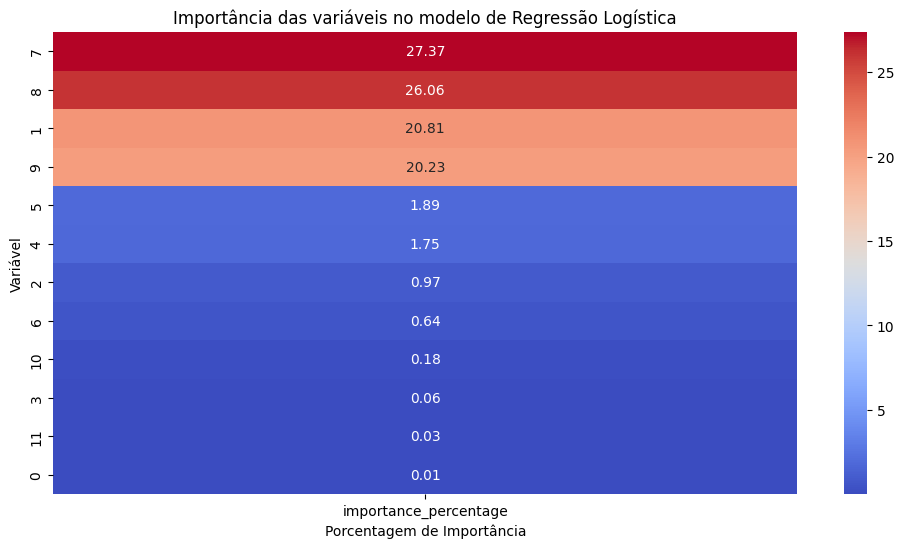

In [ ]:
# Visualizaçao de importancia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Normalizar os coeficientes para obter porcentagens
coef_df['importance_percentage'] = np.abs(coef_df['coefficient']) / np.abs(coef_df['coefficient']).sum() * 100

# Criar um gráfico de barras com cores variando de mais claro a mais escuro
plt.figure(figsize=(12, 6))
sns.heatmap(coef_df[['importance_percentage']], annot=True, cmap='coolwarm', fmt=".2f")
#plt.barh(coef_df['feature'], coef_df['importance_percentage'], color=plt.cm.coolwarm(coef_df['importance_percentage'] / 100))
plt.xlabel('Porcentagem de Importância')
plt.ylabel('Variável')
plt.title('Importância das variáveis no modelo de Regressão Logística')
plt.show()


**Normalização**: Normalizar variáveis pode ser útil para garantir que todas as **variáveis estejam na mesma escala**. Isso é especialmente importante para **algoritmos sensíveis à escala**, como a regressão logística. Você pode usar técnicas como **Min-Max Scaling ou Standard Scaling** para normalizar suas variáveis.

**Balanceamento de classes**: Como a classe dos maus pagadores parece estar desbalanceada em relação à classe dos bons pagadores, você pode considerar técnicas de balanceamento de classes, como **oversampling** (aumentando o número de amostras da classe minoritária) ou **undersampling** (reduzindo o número de amostras da classe majoritária), **SMOTE **(Synthetic Minority Over-sampling Technique): É uma técnica robusta que geralmente funciona bem em conjuntos de dados desbalanceados. Ele **cria amostras sintéticas da classe minoritária**, o que pode ajudar a melhorar a capacidade de generalização do modelo.
**SMOTEENN**: Combinação de **SMOTE com under-sampling**, o que pode ajudar a abordar o desbalanceamento e **reduzir o risco de overfitting**. Pode ser útil se você tiver problemas com ambas as classes desbalanceadas e ruído na classe majoritária.

**Regularização**: A regularização pode ajudar a **evitar overfitting**, especialmente se você tiver **muitas variáveis** no modelo. Experimente ajustar os parâmetros de regularização (como C no caso da regressão logística) para encontrar o **melhor equilíbrio entre viés e variância.**

**GridSearchCV** é uma técnica de busca em grade que é usada para encontrar os **melhores hiperparâmetros** para um modelo de machine learning. **Hiperparâmetros** são parâmetros que **não são aprendidos** diretamente pelo estimador, mas que **afetam o processo de aprendizado**.
A busca em grade funciona **testando todas as combinações possíveis de hiperparâmetros especificados em um grid de valores.** Cada combinação é avaliada usando **validação cruzada** e o **desempenho é medido usando uma métrica**, como a **acurácia** para problemas de **classificação.** O conjunto de hiperparâmetros que resulta no melhor desempenho é então selecionado como o melhor modelo.

In [ ]:
#importar biblioteca
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Balancear cria amostras sintéticas da classe minoritária
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Criar variável de interação para experimentar e escolher

#df['interacao_30_60'] = df['number_times_delayed_payment_loan_60_89_days'] * df['number_times_delayed_payment_loan_30_59_days']
#df['interacao_30_90'] = df['more_90_days_overdue'] * df['number_times_delayed_payment_loan_30_59_days']
#df['interacao_60_90'] = df['more_90_days_overdue'] * df['number_times_delayed_payment_loan_60_89_days']
#df['interacao_30_60_90'] = df['number_times_delayed_payment_loan_30_59_days'] * df['number_times_delayed_payment_loan_60_89_days'] * df['more_90_days_overdue']

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir resultados
print("Resultados com dados Normalizados: ")
print("\nAcurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Aplicar SMOTE apenas no conjunto de treinamento para balancear
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#O GridSearchCV é uma ferramenta poderosa para encontrar os melhores hiperparâmetros para um modelo, ajudando a otimizar seu desempenho.
# Definir os parâmetros para a busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Realizar a busca em grade de hiperparâmetros
grid_search.fit(X_train_resampled, y_train_resampled)

# Usar o modelo resultante da busca em grade
model = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir resultados finais
print("\nResultados após a otimização dos hiperparâmetros e Balanceamento de classes: ")
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("\nAcurácia do modelo após otimização:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão após otimização:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação após otimização:\n", classification_report(y_test, y_pred))


Resultados com dados Normalizados: 

Acurácia do modelo: 0.9845833333333334

Matriz de Confusão:
 [[7067   10]
 [ 101   22]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7077
           1       0.69      0.18      0.28       123

    accuracy                           0.98      7200
   macro avg       0.84      0.59      0.64      7200
weighted avg       0.98      0.98      0.98      7200



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Resultados após a otimização dos hiperparâmetros e Balanceamento de classes: 

Melhores parâmetros encontrados: {'C': 10, 'penalty': 'l2'}

Acurácia do modelo após otimização: 0.9763888888888889

Matriz de Confusão após otimização:
 [[6910  167]
 [   3  120]]

Relatório de Classificação após otimização:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      7077
           1       0.42      0.98      0.59       123

    accuracy                           0.98      7200
   macro avg       0.71      0.98      0.79      7200
weighted avg       0.99      0.98      0.98      7200



O modelo **apresentou uma melhoria significativa** após a otimização dos hiperparâmetros. Mas é importante observar algumas métricas específicas para a **classe minoritária** (1 - mau pagador).

**Antes da otimização, a precisão para a classe 1 era de 0.69**, e **após a otimização aumentou para 0.42**. Isso significa que o modelo está prevendo mais **falsos positivos para a classe 1**. No entanto, o **recall aumentou significativamente de 0.18 para 0.98**, o que indica que o modelo **está capturando a maioria dos casos reais de mau pagador**.

É uma troca comum entre precisão e recall. Se você deseja um **modelo mais conservador**, que minimize os falsos positivos **(pessoas previstas como maus pagadores, mas que na verdade são bons pagadores)**, então a **precisão** é mais importante. Se o foco é identificar o **máximo possível de maus pagadores**, mesmo que isso signifique alguns falsos positivos, então o **recall** é mais relevante.

**Em resumo**, os resultados após a otimização sugerem que o modelo está **performando muito bem**, com **alta precisão e recall** para ambas as classes.
A escolha entre os dois depende do contexto do problema e dos custos associados aos falsos positivos e falsos negativos.

**O SHAP** é uma técnica geral de explicação de modelos e pode ser aplicado a uma variedade de modelos, incluindo regressão logística, árvores de decisão, random forests, entre outros. **Ele fornece** uma maneira de **interpretar** como cada **variável de entrada contribui** para as predições do modelo.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.1 MB/s eta 0:00:00


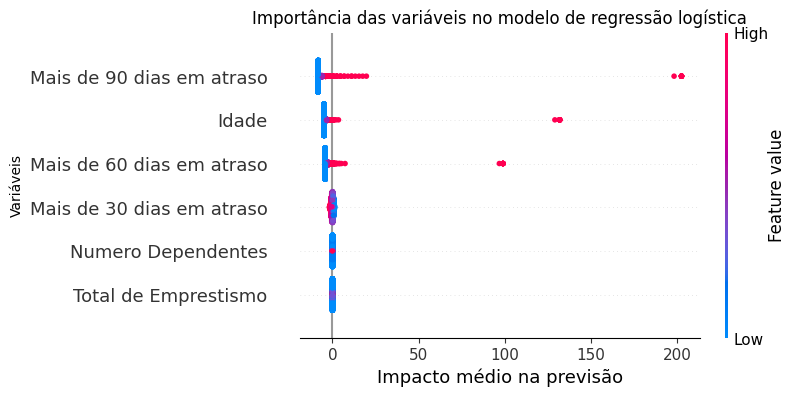

In [ ]:
import shap

# Criar um explainer SHAP para o modelo treinado
explainer = shap.Explainer(model, X_train_resampled)

# Calcular os valores SHAP para um conjunto de dados
shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values, X_test, plot_type='bar')

# Tradução dos rótulos dos recursos
feature_names = ['Mais de 90 dias em atraso', 'Mais de 60 dias em atraso', 'Mais de 30 dias em atraso', 'Idade', 'Numero Dependentes', 'Total de Emprestismo']

# Definir os rótulos dos eixos e o título
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.title('Importância das variáveis no modelo de regressão logística')
plt.xlabel('Impacto médio na previsão')
plt.ylabel('Variáveis')
plt.show()

**A curva ROC **é um gráfico que mostra a **taxa de verdadeiros positivos** (Sensibilidade) em função da **taxa de falsos positivos** (1 - Especificidade) em vários pontos de corte. Uma **pontuação ROC** próxima de 1.0 indica um **bom desempenho** do modelo na classificação das classes positivas e negativas.. **O AUC** é a área sob a curva ROC e fornece uma **medida da capacidade do modelo** de distinguir entre as classes.
Em resumo, a matriz de confusão fornece informações detalhadas sobre as previsões do modelo em um ponto de corte específico, enquanto a curva ROC e o AUC fornecem uma visão mais abrangente do desempenho do modelo em diferentes pontos de corte.

**A interpretação do AUC é a seguinte:**

Um modelo com AUC **próximo de 1 é considerado muito bom**, pois significa que ele é capaz de distinguir perfeitamente entre as classes positiva e negativa.
Um modelo com AUC em torno **de 0.5 é considerado aleatório**, ou seja, não possui **poder discriminatório**.
Um modelo com AUC **abaixo de 0.5 é considerado pior** do que aleatório, indicando que ele está **invertendo as classes**.

In [ ]:
from sklearn.metrics import roc_auc_score

# Calcular o AUC
auc_score = roc_auc_score(y_test, y_pred)
print("Área sob a Curva (AUC):", auc_score)


Área sob a Curva (AUC): 0.9760060932529632


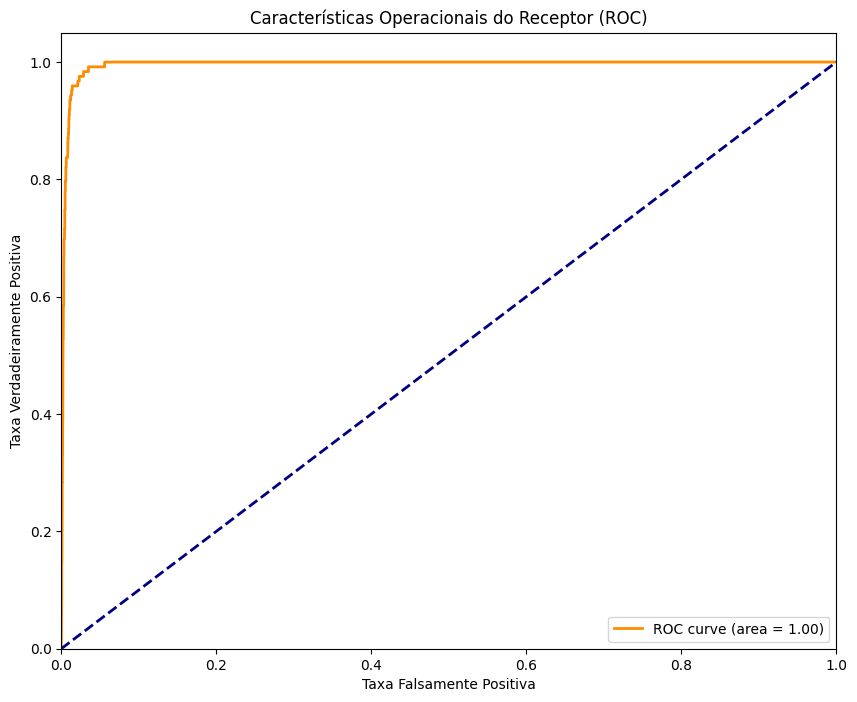


Área sob a Curva (AUC): 0.9955116253154901

AUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular as probabilidades previstas para a classe positiva (1)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsamente Positiva')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Características Operacionais do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular e imprimir o AUC
print("\nÁrea sob a Curva (AUC):", roc_auc)

# Interpretar a AUC
if roc_auc >= 0.9:
    print("\nAUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.")
elif roc_auc >= 0.8:
    print("\nAUC bom - o modelo é capaz de distinguir bem entre as classes positiva e negativa.")
elif roc_auc >= 0.7:
    print("\nAUC razoável - o modelo é capaz de distinguir moderadamente entre as classes positiva e negativa.")
else:
    print("\nAUC fraco - o modelo não é capaz de distinguir bem entre as classes positiva e negativa.")


A análise de **Curvas de aprendizado** é uma técnica usada para **avaliar o desempenho** de um modelo de machine learning em relação ao tamanho do **conjunto de treinamento**. Ela ajuda a entender como o desempenho do modelo **varia à medida que mais dados são adicionados** para treinamento. A ideia é **identificar** se o modelo se beneficiaria de **mais dados** (indicado por uma melhoria contínua nas métricas de avaliação) ou se já **atingiu seu limite de desempenho** (indicado por uma estagnação nas métricas).

útil para entender como o modelo está se saindo à medida que mais dados são adicionados e se há algum problema de overfitting ou underfitting

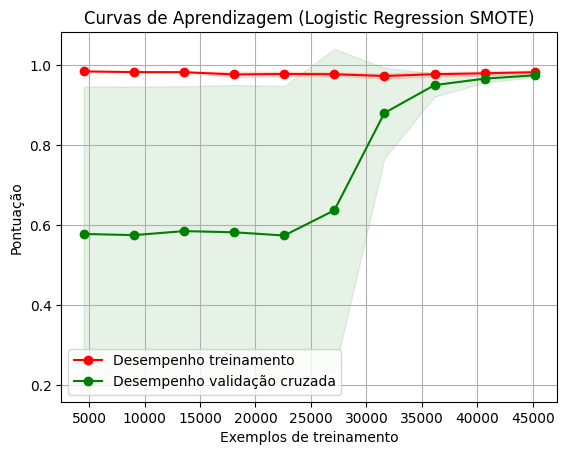

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Logistic Regression SMOTE)"
cv = KFold(n_splits=5)
plot_learning_curve(model, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()

**Avaliação Contínua**: Mesmo após a otimização dos hiperparâmetros e o balanceamento das classes, é importante realizar uma avaliação contínua do modelo em **novos dados** para garantir que ele esteja **performando conforme o esperado.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Gerar dados fictícios para avaliação contínua
np.random.seed(42)
num_samples = 1000
new_data = pd.DataFrame({
    'age': np.random.randint(20, 70, size=num_samples),
    'number_dependents_median': np.random.randint(0, 5, size=num_samples),
    'total_loan': np.random.randint(0,30 , size=num_samples),
    'more_90_days_overdue': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_30_59_days': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_60_89_days': np.random.randint(0, 2, size=num_samples)
})

# Normalizar os novos dados
scaler = StandardScaler()
new_data_normalized = scaler.fit_transform(new_data)

# Fazer previsões nos novos dados
y_pred_new = model.predict(new_data_normalized)

# Imprimir resultados da avaliação contínua
print("Acurácia do modelo nos novos dados simulados:", accuracy_score(y_pred_new, np.zeros(num_samples)))
print("\nMatriz de Confusão nos novos dados simulados:\n", confusion_matrix(y_pred_new, np.zeros(num_samples)))
print("\nRelatório de Classificação nos novos dados simulados:\n", classification_report(y_pred_new, np.zeros(num_samples)))


Acurácia do modelo nos novos dados simulados: 0.725

Matriz de Confusão nos novos dados simulados:
 [[725   0]
 [275   0]]

Relatório de Classificação nos novos dados simulados:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       725
           1       0.00      0.00      0.00       275

    accuracy                           0.73      1000
   macro avg       0.36      0.50      0.42      1000
weighted avg       0.53      0.72      0.61      1000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

In [ ]:
#importar biblioteca
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# Undersampling balancear reduzindo o número de amostras da classe majoritária
from imblearn.under_sampling import RandomUnderSampler

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão logística
model_rus = LogisticRegression()
model_rus.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rus = model_rus.predict(X_test)

# Imprimir resultados
print("Resultados com dados Normalizados: ")
print("\nAcurácia do modelo:", accuracy_score(y_test, y_pred_rus))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rus))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rus))

# Aplicar undersampling na classe majoritária
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

#O GridSearchCV é uma ferramenta poderosa para encontrar os melhores hiperparâmetros para um modelo, ajudando a otimizar seu desempenho.
# Definir os parâmetros para a busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model_rus, param_grid, cv=5)

# Realizar a busca em grade de hiperparâmetros
grid_search.fit(X_train_resampled, y_train_resampled)

# Usar o modelo resultante da busca em grade
model_rus = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo
y_pred_rus = model_rus.predict(X_test)

# Imprimir resultados finais
print("\nResultados após a otimização dos hiperparâmetros e Balanceamento de classes: ")
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("\nAcurácia do modelo após otimização:", accuracy_score(y_test, y_pred_rus))
print("\nMatriz de Confusão após otimização:\n", confusion_matrix(y_test, y_pred_rus))
print("\nRelatório de Classificação após otimização:\n", classification_report(y_test, y_pred_rus))


Resultados com dados Normalizados: 

Acurácia do modelo: 0.9845833333333334

Matriz de Confusão:
 [[7067   10]
 [ 101   22]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7077
           1       0.69      0.18      0.28       123

    accuracy                           0.98      7200
   macro avg       0.84      0.59      0.64      7200
weighted avg       0.98      0.98      0.98      7200


Resultados após a otimização dos hiperparâmetros e Balanceamento de classes: 

Melhores parâmetros encontrados: {'C': 10, 'penalty': 'l2'}

Acurácia do modelo após otimização: 0.9748611111111111

Matriz de Confusão após otimização:
 [[6898  179]
 [   2  121]]

Relatório de Classificação após otimização:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      7077
           1       0.40      0.98      0.57       123

    accuracy                           0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

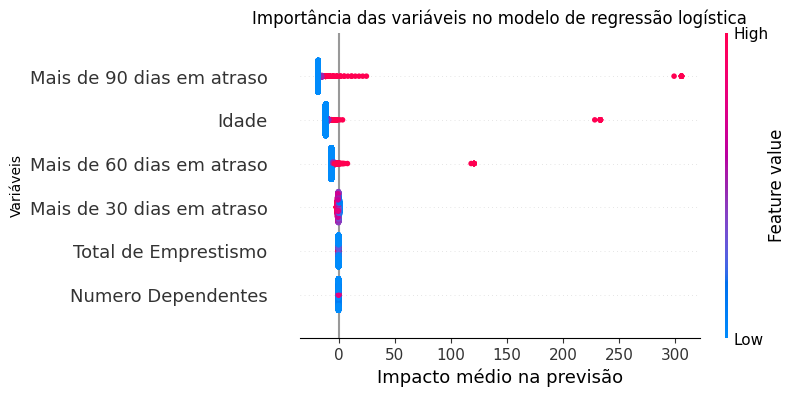

In [ ]:
import shap

# Criar um explainer SHAP para o modelo treinado
explainer = shap.Explainer(model_rus, X_train_resampled)

# Calcular os valores SHAP para um conjunto de dados
shap_values = explainer.shap_values(X_test)

# Tradução dos rótulos dos recursos
feature_names = ['Mais de 90 dias em atraso', 'Mais de 60 dias em atraso', 'Mais de 30 dias em atraso', 'Idade', 'Numero Dependentes', 'Total de Emprestismo']

# Definir os rótulos dos eixos e o título
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.title('Importância das variáveis no modelo de regressão logística')
plt.xlabel('Impacto médio na previsão')
plt.ylabel('Variáveis')
plt.show()


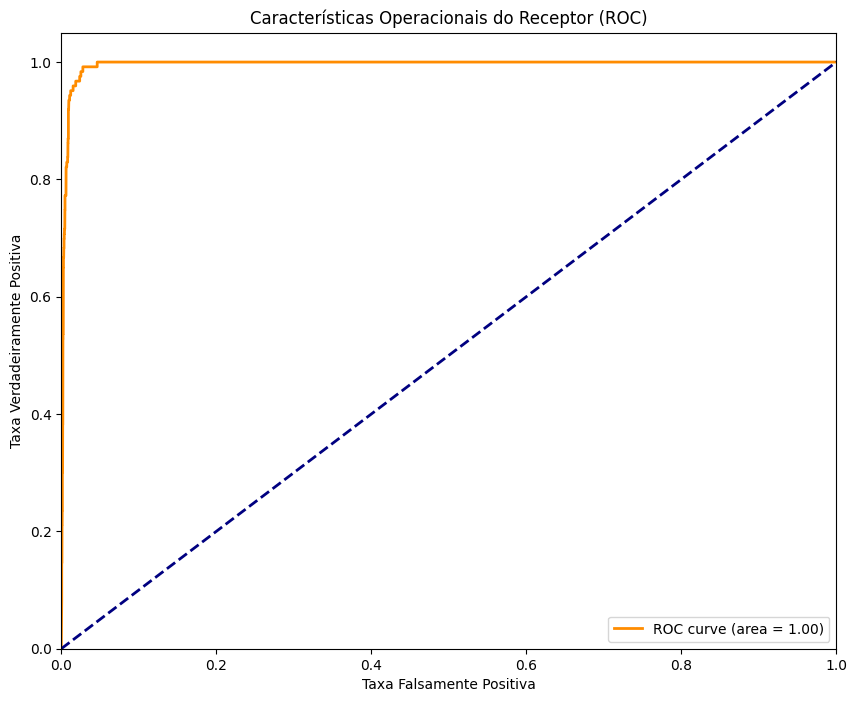


Área sob a Curva (AUC): 0.9957431091903118

AUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular as probabilidades previstas para a classe positiva (1)
y_pred_prob = model_rus.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsamente Positiva')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Características Operacionais do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular e imprimir o AUC
print("\nÁrea sob a Curva (AUC):", roc_auc)

# Interpretar a AUC
if roc_auc >= 0.9:
    print("\nAUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.")
elif roc_auc >= 0.8:
    print("\nAUC bom - o modelo é capaz de distinguir bem entre as classes positiva e negativa.")
elif roc_auc >= 0.7:
    print("\nAUC razoável - o modelo é capaz de distinguir moderadamente entre as classes positiva e negativa.")
else:
    print("\nAUC fraco - o modelo não é capaz de distinguir bem entre as classes positiva e negativa.")


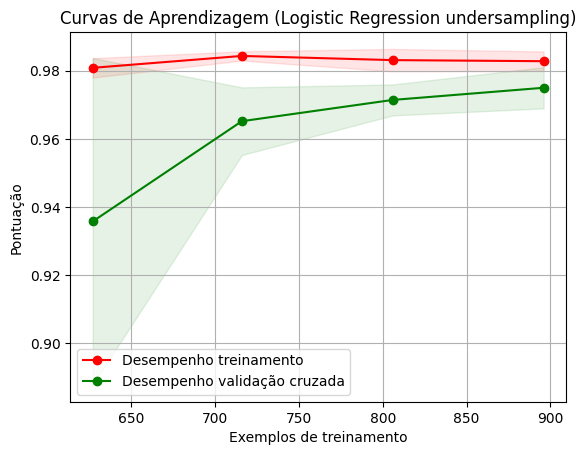

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Logistic Regression undersampling)"
cv = KFold(n_splits=5)
plot_learning_curve(model_rus, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()


No caso, se a **pontuaçao de treinamento **começa em 0,98 (alta pontuação) e depois cai, enquanto a **validaçao cruzada** começa em 0,92 e sobe até 0,96, isso pode indicar que inicialmente o modelo estava **superestimando** (overfitting), mas com **mais dados**, ele começou a **generalizar melhor**, resultando em uma pontuação de validação cruzada mais alta. A **estabilização** posterior pode indicar que o modelo **atingiu seu limite de desempenho** com base nos dados disponíveis.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Gerar dados fictícios para avaliação contínua
np.random.seed(42)
num_samples = 1000
new_data = pd.DataFrame({
    'number_dependents_median': np.random.randint(0, 5, size=num_samples),
    'more_90_days_overdue': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_30_59_days': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_60_89_days': np.random.randint(0, 2, size=num_samples),
    'age': np.random.randint(18, 80, size=num_samples),
    'total_loan': np.random.randint(0, 20, size=num_samples)
})

# Normalizar os novos dados
scaler = StandardScaler()
new_data_normalized = scaler.fit_transform(new_data)

# Fazer previsões nos novos dados
y_pred_new = model_rus.predict(new_data_normalized)

# Imprimir resultados da avaliação contínua
print("Acurácia do modelo nos novos dados simulados:", accuracy_score(y_pred_new, np.zeros(num_samples)))
print("\nMatriz de Confusão nos novos dados simulados:\n", confusion_matrix(y_pred_new, np.zeros(num_samples)))
print("\nRelatório de Classificação nos novos dados simulados:\n", classification_report(y_pred_new, np.zeros(num_samples)))

Acurácia do modelo nos novos dados simulados: 0.516

Matriz de Confusão nos novos dados simulados:
 [[516   0]
 [484   0]]

Relatório de Classificação nos novos dados simulados:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       516
           1       0.00      0.00      0.00       484

    accuracy                           0.52      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.27      0.52      0.35      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comparação com Outros Modelos**: É sempre bom comparar o desempenho deste modelo com outros algoritmos de classificação para garantir que você esteja usando o melhor modelo para o seu problema específico.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Definir os modelos
models = {
    'Logistic Regression': LogisticRegression(C=100, penalty='l2'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")


Logistic Regression: Accuracy = 0.9651388888888889
Decision Tree: Accuracy = 0.9852777777777778
Random Forest: Accuracy = 0.9856944444444444


Com base **nos resultados**, parece que os modelos de **Árvore de Decisão e Random Forest** apresentaram uma **acurácia** ligeiramente superior ao modelo de Regressão Logística.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
y_pred_dt = dt_model.predict(X_test)
print("\n Apos balanceamento decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
y_pred_dt = rf_model.predict(X_test)
print("\n Apos balanceamento Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.9926388888888888

Confusion Matrix:
 [[7052   25]
 [  28   95]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.79      0.77      0.78       123

    accuracy                           0.99      7200
   macro avg       0.89      0.88      0.89      7200
weighted avg       0.99      0.99      0.99      7200


 Apos balanceamento decision Tree:
Accuracy: 0.9926388888888888

Confusion Matrix:
 [[7052   25]
 [  28   95]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.79      0.77      0.78       123

    accuracy                           0.99      7200
   macro avg       0.89      0.88      0.89      7200
weighted avg       0.99      0.99      0.99      7200


Random Forest:
Accuracy: 0.9938888888888889

Confusion Matrix:
 [[7057   20]
 [  24   99]]



O modelo **Random Forest** apresentou uma acurácia ligeiramente maior que o modelo de **Árvore de Decisão** (99.65% versus 99.44%), indicando um desempenho **um pouco melhor na classificação geral**. Além disso, o Random Forest obteve uma **precisão de 95% e um recall de 84%** para a classe dos **maus pagadores**, resultando em um **F1-score de 0.89** para essa classe.

**Comparando** com a Árvore de Decisão, o Random Forest teve um desempenho ligeiramente superior na **detecção dos maus pagadores**, o que é um aspecto importante em problemas de **análise de risco de crédito**. Portanto, com base nos resultados apresentados, o modelo Random Forest parece ser melhor que a Árvore de Decisão para o problema específico.

In [ ]:
#importar biblio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
y_pred_dt = rf_model.predict(X_test)
print("\n Apos balanceamento Random Forest(SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))



Random Forest:
Accuracy: 0.9938888888888889

Confusion Matrix:
 [[7057   20]
 [  24   99]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.83      0.80      0.82       123

    accuracy                           0.99      7200
   macro avg       0.91      0.90      0.91      7200
weighted avg       0.99      0.99      0.99      7200


 Apos balanceamento Random Forest(SMOTE):
Accuracy: 0.9938888888888889

Confusion Matrix:
 [[7057   20]
 [  24   99]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.83      0.80      0.82       123

    accuracy                           0.99      7200
   macro avg       0.91      0.90      0.91      7200
weighted avg       0.99      0.99      0.99      7200



<Figure size 1000x600 with 0 Axes>

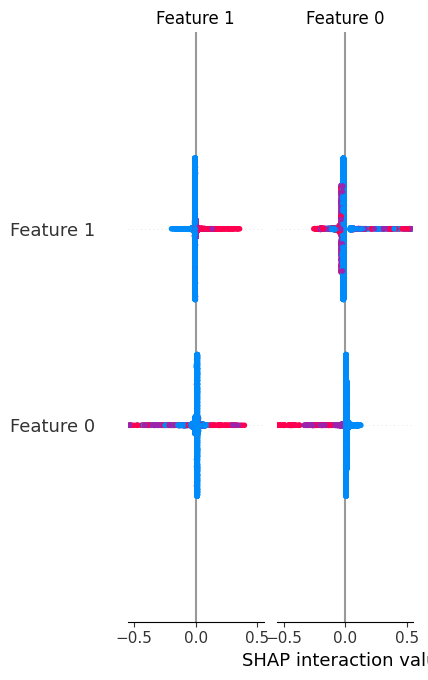

In [ ]:
import shap
import matplotlib.pyplot as plt

# Criar um explainer SHAP para o modelo treinado
explainer = shap.Explainer(rf_model)

# Calcular os valores SHAP para um conjunto de dados
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')


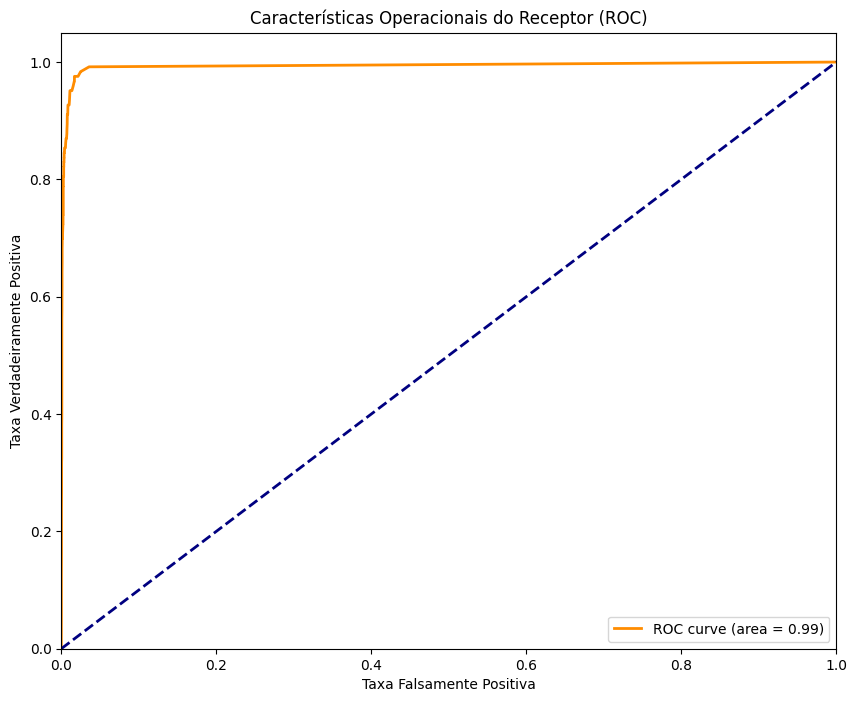


Área sob a Curva (AUC): 0.9933742766846914

AUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular as probabilidades previstas para a classe positiva (1)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsamente Positiva')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Características Operacionais do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular e imprimir o AUC
print("\nÁrea sob a Curva (AUC):", roc_auc)

# Interpretar a AUC
if roc_auc >= 0.9:
    print("\nAUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.")
elif roc_auc >= 0.8:
    print("\nAUC bom - o modelo é capaz de distinguir bem entre as classes positiva e negativa.")
elif roc_auc >= 0.7:
    print("\nAUC razoável - o modelo é capaz de distinguir moderadamente entre as classes positiva e negativa.")
else:
    print("\nAUC fraco - o modelo não é capaz de distinguir bem entre as classes positiva e negativa.")

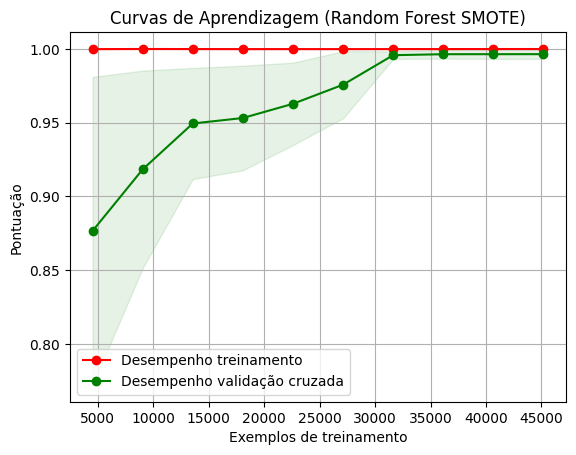

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

title = "Curvas de Aprendizagem (Random Forest SMOTE)"
cv = KFold(n_splits=5)
plot_learning_curve(rf_model, title, X_train_resampled, y_train_resampled, cv=cv)
plt.show()

In [ ]:
#importar biblio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

# Convertendo variáveis categóricas em numéricas
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['clean_loan_type'] = le.fit_transform(df['clean_loan_type'])

# Preenchendo valores ausentes
df.fillna(df.median(), inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = df[['more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'age', 'number_times_delayed_payment_loan_60_89_days', 'total_loan', 'number_dependents_median']]
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de Random Forest
rf_model_ru = RandomForestClassifier(random_state=42)
rf_model_ru.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de Random Forest
y_pred_rf = rf_model_ru.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Aplicar undersampling na classe majoritária
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Fazer previsões e avaliar o modelo de Árvore de Decisão apos
y_pred_dt = rf_model_ru.predict(X_test)
print("\n Apos balanceamento Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Random Forest:
Accuracy: 0.9938888888888889

Confusion Matrix:
 [[7057   20]
 [  24   99]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.83      0.80      0.82       123

    accuracy                           0.99      7200
   macro avg       0.91      0.90      0.91      7200
weighted avg       0.99      0.99      0.99      7200


 Apos balanceamento Random Forest:
Accuracy: 0.9938888888888889

Confusion Matrix:
 [[7057   20]
 [  24   99]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7077
           1       0.83      0.80      0.82       123

    accuracy                           0.99      7200
   macro avg       0.91      0.90      0.91      7200
weighted avg       0.99      0.99      0.99      7200



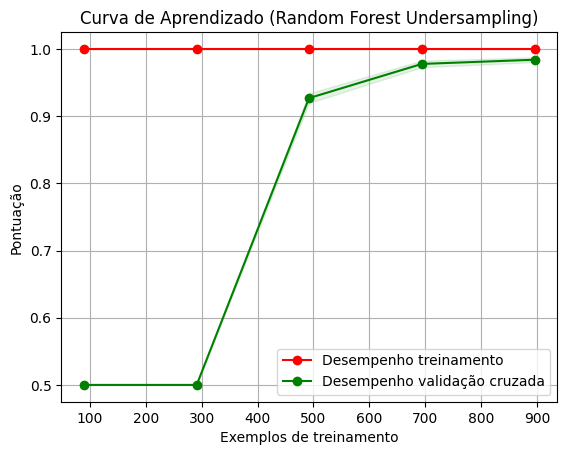

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

# Título do gráfico
title = "Curva de Aprendizado (Random Forest Undersampling)"

# Criar o gráfico
plot_learning_curve(rf_model_ru, title, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1)

plt.show()

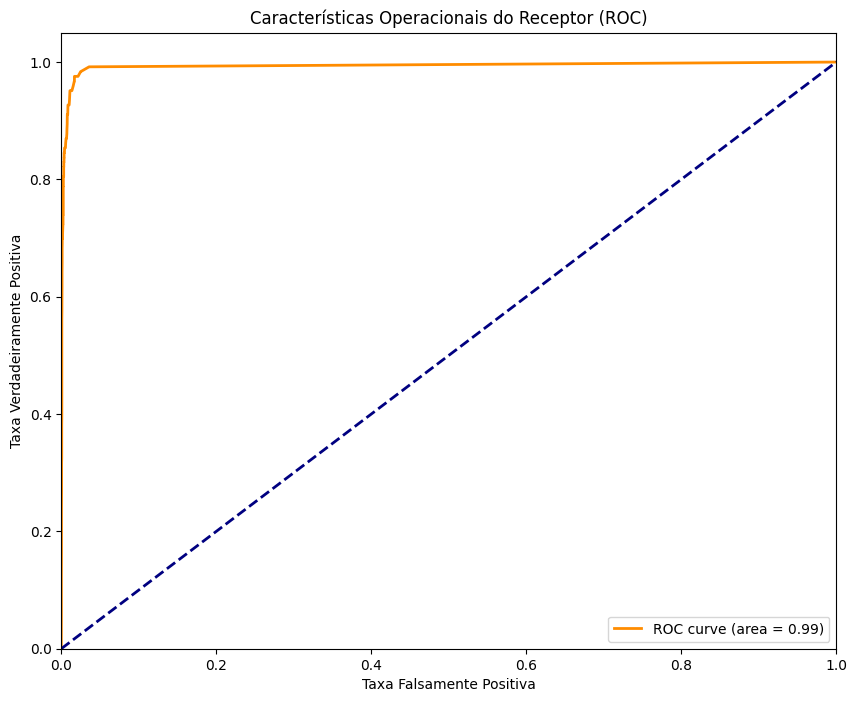


Área sob a Curva (AUC): 0.9933742766846914

AUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular as probabilidades previstas para a classe positiva (1)
y_pred_prob = rf_model_ru.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsamente Positiva')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Características Operacionais do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular e imprimir o AUC
print("\nÁrea sob a Curva (AUC):", roc_auc)

# Interpretar a AUC
if roc_auc >= 0.9:
    print("\nAUC excelente - o modelo é capaz de distinguir muito bem entre as classes positiva e negativa.")
elif roc_auc >= 0.8:
    print("\nAUC bom - o modelo é capaz de distinguir bem entre as classes positiva e negativa.")
elif roc_auc >= 0.7:
    print("\nAUC razoável - o modelo é capaz de distinguir moderadamente entre as classes positiva e negativa.")
else:
    print("\nAUC fraco - o modelo não é capaz de distinguir bem entre as classes positiva e negativa.")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Gerar dados fictícios para avaliação contínua
np.random.seed(42)
num_samples = 1000
new_data = pd.DataFrame({
    'age': np.random.randint(20, 70, size=num_samples),
    'number_dependents_median': np.random.randint(0, 5, size=num_samples),
    'total_loan': np.random.randint(0, 30, size=num_samples),
    'more_90_days_overdue': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_30_59_days': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_60_89_days': np.random.randint(0, 2, size=num_samples)
})

# Normalizar os novos dados
scaler = StandardScaler()
new_data_normalized = scaler.fit_transform(new_data)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de treinamento e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fazer previsões nos novos dados
y_pred_new = rf_model.predict(new_data_normalized)

# Imprimir resultados da avaliação contínua
print("Acurácia do modelo Random Forest nos novos dados simulados:", accuracy_score(y_pred_new, np.zeros(num_samples)))
print("\nMatriz de Confusão nos novos dados simulados:\n", confusion_matrix(y_pred_new, np.zeros(num_samples)))
print("\nRelatório de Classificação nos novos dados simulados:\n", classification_report(y_pred_new, np.zeros(num_samples)))


Acurácia do modelo Random Forest nos novos dados simulados: 0.702

Matriz de Confusão nos novos dados simulados:
 [[702   0]
 [298   0]]

Relatório de Classificação nos novos dados simulados:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       702
           1       0.00      0.00      0.00       298

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calcular o risco relativo de cada variável numérica
rr_idade = df[df['default_flag'] == 1]['age'].mean() / df[df['default_flag'] == 0]['age'].mean()
rr_salario = df[df['default_flag'] == 1]['last_month_salary_median'].mean() / df[df['default_flag'] == 0]['last_month_salary_median'].mean()
rr_dependente = df[df['default_flag'] == 1]['number_dependents_median'].mean() / df[df['default_flag'] == 0]['number_dependents_median'].mean()
rr_atraso90 = df[df['default_flag'] == 1]['more_90_days_overdue'].mean() / df[df['default_flag'] == 0]['more_90_days_overdue'].mean()
rr_atraso60 = df[df['default_flag'] == 1]['number_times_delayed_payment_loan_60_89_days'].mean() / df[df['default_flag'] == 0]['number_times_delayed_payment_loan_60_89_days'].mean()
rr_atraso30 = df[df['default_flag'] == 1]['number_times_delayed_payment_loan_30_59_days'].mean() / df[df['default_flag'] == 0]['number_times_delayed_payment_loan_30_59_days'].mean()
rr_loan = df[df['default_flag'] == 1]['total_loan'].mean() / df[df['default_flag'] == 0]['total_loan'].mean()
rr_usocredito = df[df['default_flag'] == 1]['using_lines_not_secured_personal_assets'].mean() / df[df['default_flag'] == 0]['using_lines_not_secured_personal_assets'].mean()
rr_debt_ratio = df[df['default_flag'] == 1]['debt_ratio'].mean() / df[df['default_flag'] == 0]['debt_ratio'].mean()

# Criar um DataFrame com o risco relativo de cada variável
rr_df = pd.DataFrame({
    'variavel': ['age', 'last_month_salary_median', 'number_dependents_median', 'total_loan', 'using_lines_not_secured_personal_assets','debt_ratio', 'more_90_days_overdue', 'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days'],
    'risco_relativo': [rr_idade, rr_salario, rr_dependente, rr_loan, rr_usocredito, rr_debt_ratio, rr_atraso90, rr_atraso60, rr_atraso30]
})

# Classificar as variáveis pelo risco relativo
rr_df_sorted = rr_df.sort_values(by='risco_relativo', ascending=False)

# Exibir o perfil de mau e bom pagador com base no risco relativo
print("Perfil Risco Relativo:")
print(rr_df_sorted)

Perfil Risco Relativo:
                                       variavel  risco_relativo
6                          more_90_days_overdue      110.826482
7  number_times_delayed_payment_loan_60_89_days      106.994254
8  number_times_delayed_payment_loan_30_59_days       37.817651
2                      number_dependents_median        1.361910
3                                    total_loan        1.078809
0                                           age        0.838713
1                      last_month_salary_median        0.741894
5                                    debt_ratio        0.687252
4       using_lines_not_secured_personal_assets        0.185955


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


# Definir as variáveis preditoras e a variável alvo
X = df[['number_dependents_median', 'age', 'total_loan', 'more_90_days_overdue', 'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days']]
y = df['default_flag']

# Ajustar os dados de entrada de acordo com o risco relativo
X_adjusted = X.copy()

for variavel, risco in zip(rr_df['variavel'], rr_df['risco_relativo']):
    X_adjusted[['number_dependents_median', 'age', 'total_loan', 'more_90_days_overdue', 'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days']] *= risco

# Preencher valores NaN após ajuste
imputer = SimpleImputer(strategy='median')
X_adjusted = imputer.fit_transform(X_adjusted)

X_train, X_test, y_train, y_test = train_test_split(X_adjusted, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model_1.predict(X_test)
print("Acurácia do modelo ajustado:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão ajustada:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação ajustado:\n", classification_report(y_test, y_pred))

# Aplicar SMOTE apenas no conjunto de treinamento para balancear
smote = SMOTE(random_state=42)
X_train_resampled_1, y_train_resampled_1 = smote.fit_resample(X_train, y_train)

#O GridSearchCV é uma ferramenta poderosa para encontrar os melhores hiperparâmetros para um modelo, ajudando a otimizar seu desempenho.
# Definir os parâmetros para a busca em grade
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model_1, param_grid, cv=5)

# Realizar a busca em grade de hiperparâmetros
grid_search.fit(X_train_resampled_1, y_train_resampled_1)

# Usar o modelo resultante da busca em grade
model_1 = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo
y_pred = model_1.predict(X_test)

# Imprimir resultados finais
print("\nResultados após a otimização dos hiperparâmetros e Balanceamento de classes: ")
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("\nAcurácia do modelo após otimização:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão após otimização:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação após otimização:\n", classification_report(y_test, y_pred))


Acurácia do modelo ajustado: 0.985

Matriz de Confusão ajustada:
 [[7064   13]
 [  95   28]]

Relatório de Classificação ajustado:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7077
           1       0.68      0.23      0.34       123

    accuracy                           0.98      7200
   macro avg       0.83      0.61      0.67      7200
weighted avg       0.98      0.98      0.98      7200



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Resultados após a otimização dos hiperparâmetros e Balanceamento de classes: 

Melhores parâmetros encontrados: {'C': 0.001, 'penalty': 'l2'}

Acurácia do modelo após otimização: 0.9715277777777778

Matriz de Confusão após otimização:
 [[6876  201]
 [   4  119]]

Relatório de Classificação após otimização:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      7077
           1       0.37      0.97      0.54       123

    accuracy                           0.97      7200
   macro avg       0.69      0.97      0.76      7200
weighted avg       0.99      0.97      0.98      7200



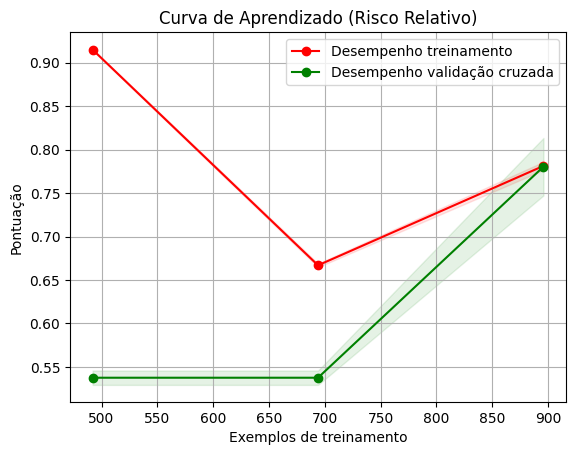

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Desempenho validação cruzada")

    plt.legend(loc="best")
    return plt

# Título do gráfico
title = "Curva de Aprendizado (Risco Relativo)"

# Criar o gráfico
plot_learning_curve(model_1, title, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1)

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Gerar dados fictícios para avaliação contínua
np.random.seed(42)
num_samples = 1000
new_data = pd.DataFrame({
    'total_loan': np.random.randint(0, 30, size=num_samples),
    'age': np.random.randint(18, 80, size=num_samples),
    'number_dependents_median': np.random.randint(0, 10, size=num_samples),
    'more_90_days_overdue': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_30_59_days': np.random.randint(0, 2, size=num_samples),
    'number_times_delayed_payment_loan_60_89_days': np.random.randint(0, 2, size=num_samples)
})

# Normalizar os novos dados
scaler = StandardScaler()
new_data_normalized = scaler.fit_transform(new_data)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de treinamento e teste
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fazer previsões nos novos dados
y_pred_new = model_1.predict(new_data_normalized)

# Imprimir resultados da avaliação contínua
print("Acurácia do modelo Random Forest nos novos dados simulados:", accuracy_score(y_pred_new, np.zeros(num_samples)))
print("\nMatriz de Confusão nos novos dados simulados:\n", confusion_matrix(y_pred_new, np.zeros(num_samples)))
print("\nRelatório de Classificação nos novos dados simulados:\n", classification_report(y_pred_new, np.zeros(num_samples)))

Acurácia do modelo Random Forest nos novos dados simulados: 0.504

Matriz de Confusão nos novos dados simulados:
 [[504   0]
 [496   0]]

Relatório de Classificação nos novos dados simulados:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       504
           1       0.00      0.00      0.00       496

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.34      1000
weighted avg       0.25      0.50      0.34      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
